voir code Baptiste : https://github.com/chloepasturel/OptimalPrecision/blob/master/2017-07-10%20Saccadic%20correction.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Saccade(x, bino, tau, x1, x2, T0, t1, t2, tr):
    
    time = x - T0
    
    T1 = t1
    T2 = t1+t2
    TR = T2+tr
    
    rho = (tau/T1) * np.log((1+np.exp(T1/tau))/2)
    rhoT = int(np.round(T1*rho))
    
    r = (tau/T2) * np.log((np.exp(T1/tau) + np.exp(T2/tau)) /2)
    rT = int(np.round(T2*r))
    
    
    Umax1 = (1/tau) * x1 / ((2*rho-1)*T1 - tau*(2-np.exp(-(rho*T1)/tau) - np.exp((1-rho)*T1/tau)))
    Umax2 = (1/tau) * (x2-x1) / ((2*r-1)*T2-T1)

    xx = []    
    for t in time :
        if t < 0 :
            xx.append(np.nan)
        elif t < rhoT :
            xx.append((     Umax1*tau * ((t)    - tau*(1-np.exp(-t/tau))))*(bino*2-1))
        elif t < T1 :
            xx.append((x1 + Umax1*tau * ((T1-t) + tau*(1-np.exp((T1-t)/tau))))*(bino*2-1))
        elif t < rT :
            xx.append((x1 + Umax2*tau * ((t-T1) - tau*(1-np.exp(-(t-T1)/tau))))*(bino*2-1))
        elif t < TR :
            xx.append((x2 + Umax2*tau * ((T2-t) + tau*(1-np.exp((T2-t)/tau))))*(bino*2-1))
        else :
            xx.append(np.nan)
                      
    return xx, time, T0+rhoT, T0+rT

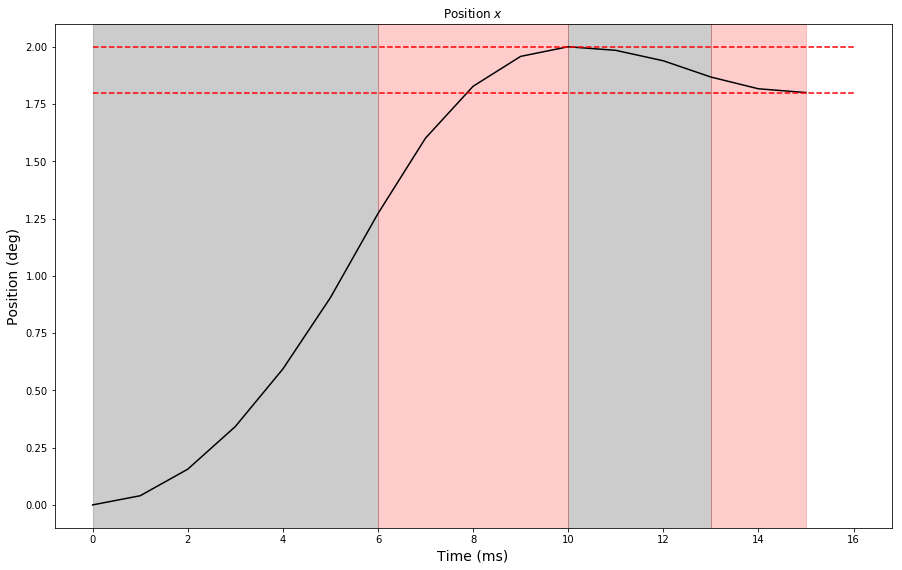

In [3]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

T0=0

x1, x2 = 2, 1.8
t1, t2, tr = 10, 5, 1
T1, T2, TR = T0+t1, T0+t1+t2, T0+t1+t2+tr


x = np.arange(T0+1000)
xx, time, rhoT, rT = Saccade(x, bino=1,tau=13, x1=x1, x2=x2, t1=t1, t2=t2, tr=tr, T0=T0)

ax.plot(x, xx, 'k')



ax.axvspan(T0, rhoT, color='k', alpha=0.2)
ax.axvspan(rhoT, T1, color='r', alpha=0.2)
ax.axvspan(T1, rT, color='k', alpha=0.2)
ax.axvspan(rT, T2, color='r', alpha=0.2)
ax.plot([0,(T2+1)],[x1,x1], 'r--')
ax.plot([0,(T2+1)],[x2,x2], 'r--')

ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14);